In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
House_df=pd.read_csv(r"C:\Users\jagan\Downloads\archive (4)\Housing.csv")
House_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [49]:
House_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
House_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [51]:
cat=House_df.select_dtypes(include='object').columns
cat

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [52]:
num=House_df.select_dtypes(exclude='object').columns
num

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [53]:
House_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

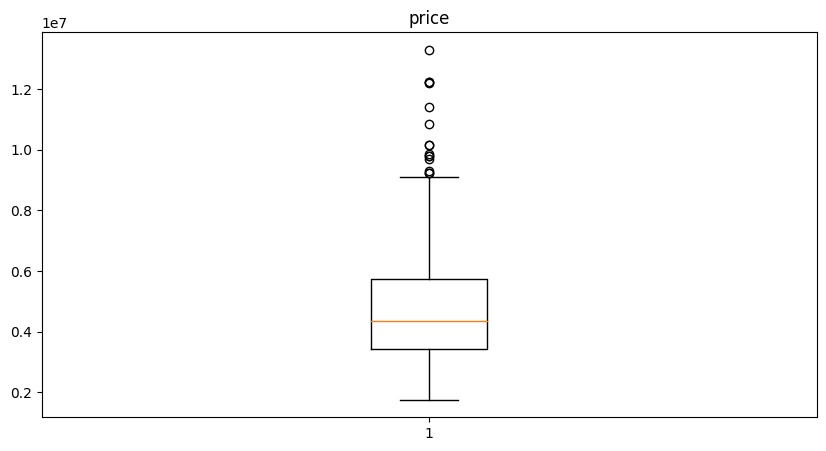

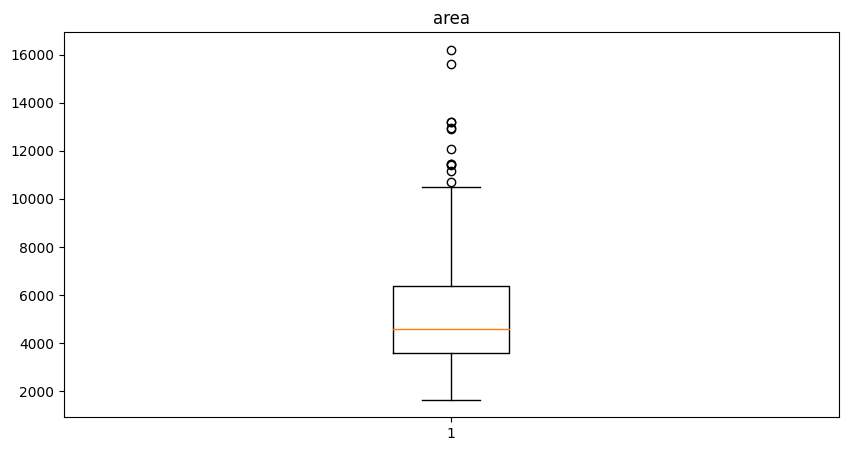

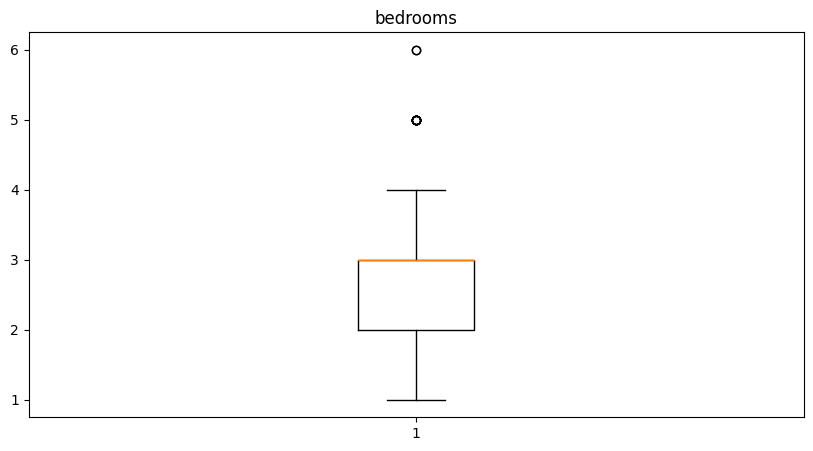

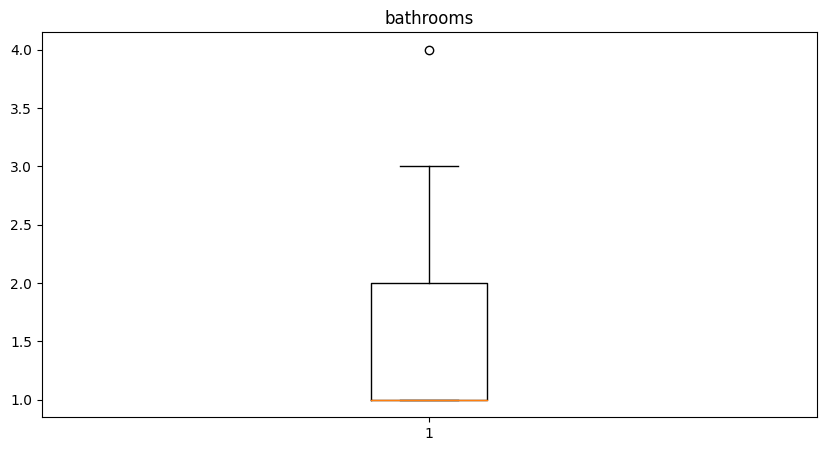

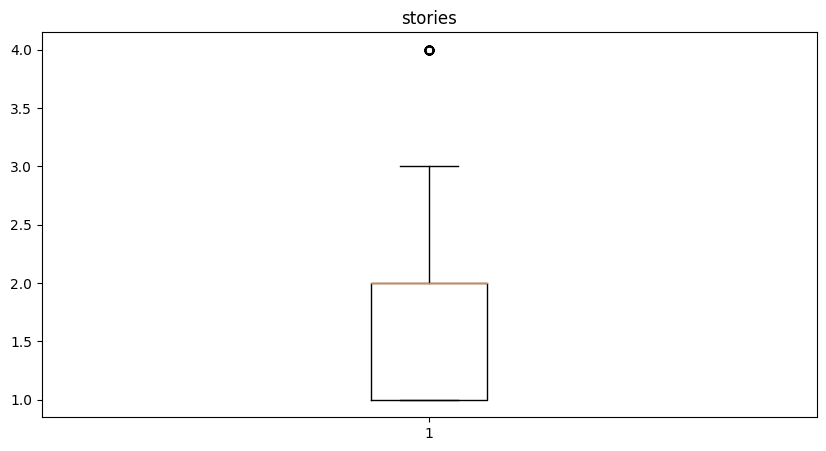

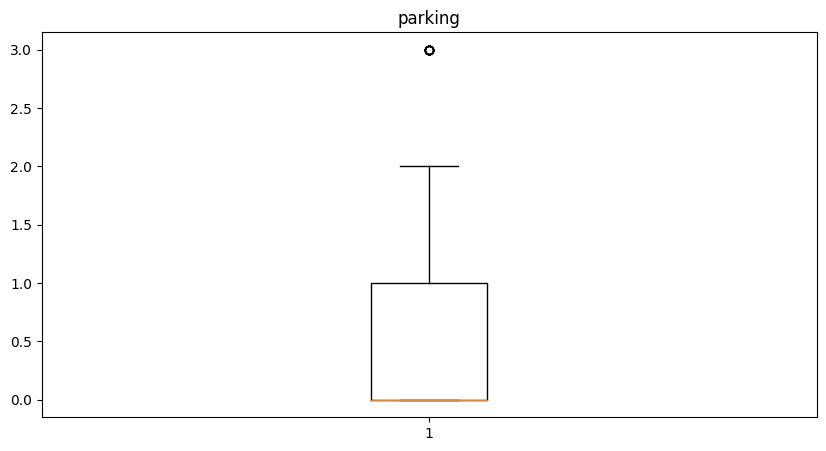

In [54]:
for i in num:
    plt.figure(figsize=(10,5))
    plt.boxplot(House_df[i])
    plt.title(f"{i}")
    plt.show()

In [55]:
for i in num:
    q1=np.quantile(House_df[i],0.25)
    q3=np.quantile(House_df[i],0.75)
    lb=q1-1.5*(q3-q1)
    ub=q3+1.5*(q3-q1)
    med=House_df[i].median()
    con=(House_df[i]<lb) | (House_df[i]>ub)
    true=med
    false=House_df[i]
    House_df[i]=np.where(con,true,false)
House_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,4340000.0,8960.0,4.0,1.0,2.0,yes,no,no,no,yes,0.0,no,furnished
2,4340000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,4340000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,0.0,yes,furnished
4,4340000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150.0,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000.0,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000.0,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


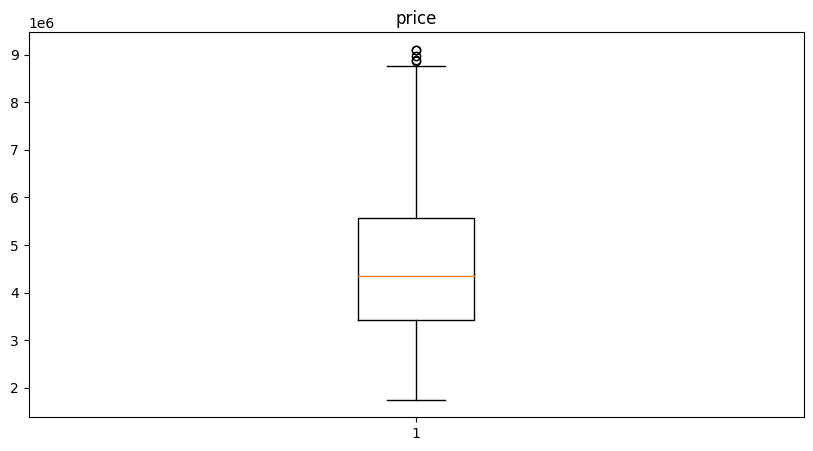

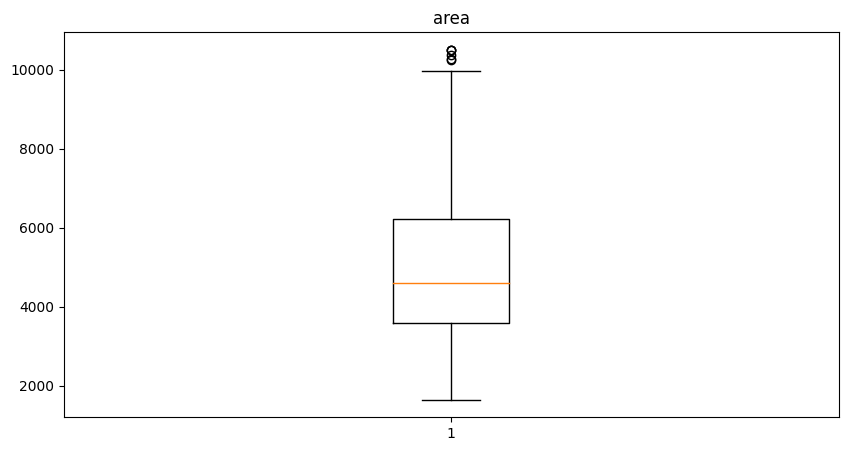

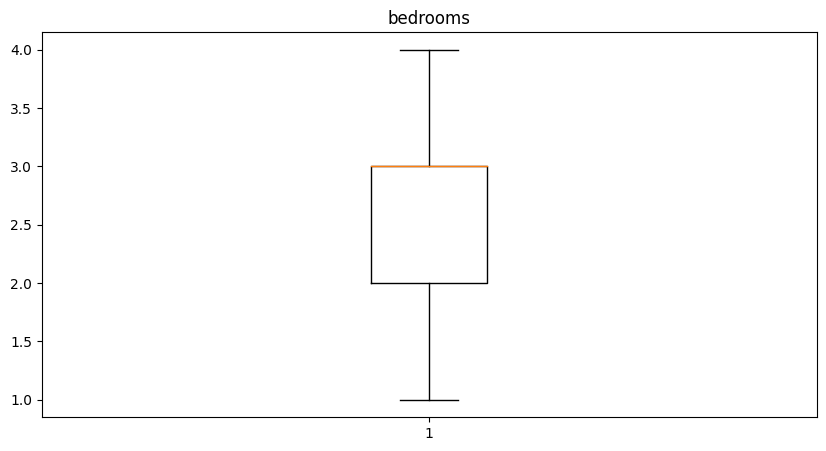

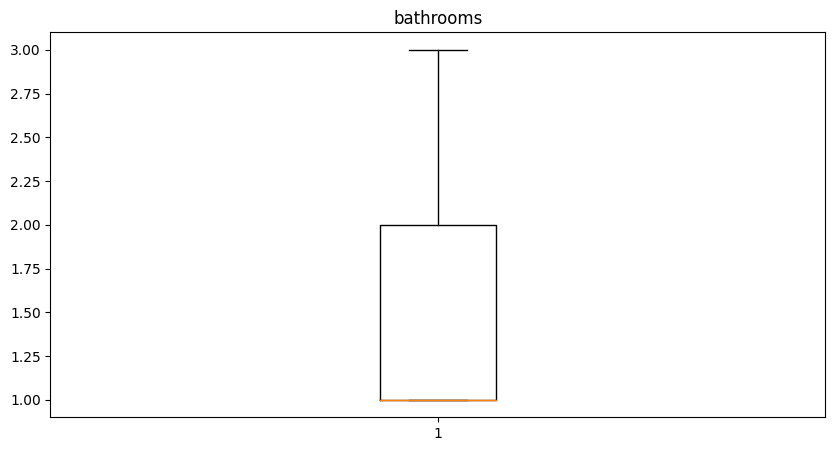

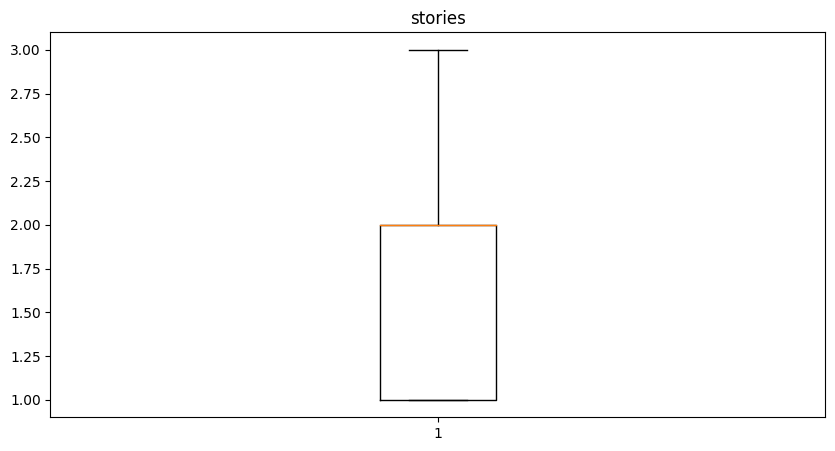

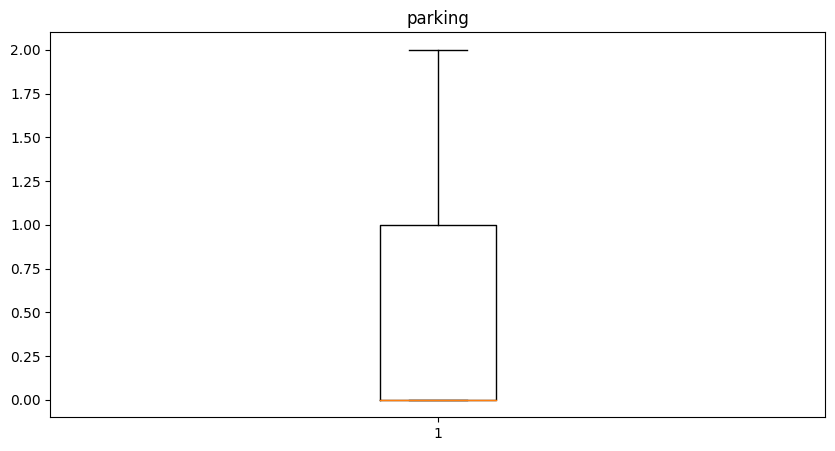

In [56]:
for i in num:
    plt.figure(figsize=(10,5))
    plt.boxplot(House_df[i])
    plt.title(f"{i}")
    plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
ll=LabelEncoder()
for i in cat:
    House_df[i]=ll.fit_transform(House_df[[i]])
House_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4340000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,4340000.0,8960.0,4.0,1.0,2.0,1,0,0,0,1,0.0,0,0
2,4340000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,4340000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,1,0
4,4340000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,2
541,1767150.0,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,1750000.0,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,2
543,1750000.0,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0


In [58]:
X=House_df.drop('furnishingstatus',axis=1)
Y=House_df['furnishingstatus']

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in X:
   X[i]=ss.fit_transform(X[[i]])
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,-0.161140,1.334706,1.647621,1.472436,2.213845,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.729065,1.804941
1,-0.161140,2.174467,1.647621,-0.574701,0.567807,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.790562,-0.554035
2,-0.161140,2.719766,0.125666,1.472436,0.567807,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.729065,1.804941
3,-0.161140,1.378330,1.647621,1.472436,0.567807,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.790562,1.804941
4,-0.161140,1.334706,1.647621,-0.574701,0.567807,0.405623,2.149083,1.361397,-0.219265,1.472618,1.729065,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.763079,-1.075516,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.729065,-0.554035
541,-1.796676,-1.402696,0.125666,-0.574701,-1.078230,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
542,-1.807578,-0.737431,-1.396289,-0.574701,-1.078230,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035
543,-1.807578,-1.124593,0.125666,-0.574701,-1.078230,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.790562,-0.554035


**Split data into train-test sets**

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

**Fit a Linear Regression model using sklearn.linear_model**

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model

LinearRegression()

In [63]:
y_pred=model.predict(x_test)
y_pred

array([1.24656553, 0.8996068 , 1.36721776, 0.80926742, 1.25128608,
       0.8735966 , 0.84715741, 1.39157219, 0.9793018 , 1.31147739,
       1.19352315, 0.73606772, 1.3143335 , 1.52531708, 1.25362485,
       1.27515238, 1.38327373, 0.65794019, 1.38647872, 1.2968693 ,
       1.07234393, 1.43874913, 1.58990524, 1.0480239 , 1.28323042,
       1.25218045, 0.83988931, 1.01042151, 1.21216415, 0.38286424,
       1.53989324, 1.28815375, 1.53964557, 0.87659332, 0.65680683,
       0.6694258 , 1.34496053, 0.84095424, 0.97568601, 1.15584581,
       1.23823683, 0.96935333, 1.29556455, 1.38702367, 1.23922467,
       1.04280369, 1.28206413, 0.81558348, 0.85160894, 0.82490715,
       0.65555128, 0.96919114, 1.43604421, 1.17613831, 1.04075503,
       0.55338063, 1.405885  , 0.99669583, 0.97468966, 0.90296263,
       0.31945846, 1.09306358, 0.85457757, 1.21264898, 1.1271    ,
       1.01846962, 1.33463529, 1.09471114, 1.09521779, 0.76199278,
       1.07005794, 0.62142718, 0.78687667, 0.96530087, 0.79054

**Evaluate model using MAE, MSE, R²**

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
R_square=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Mse',mse)
print('MAE',mae)
print('r2_score',R_square)

Mse 0.5436413015270982
MAE 0.6099167135901798
r2_score 0.003240385271071733


**Plot regression line and interpret coefficients**

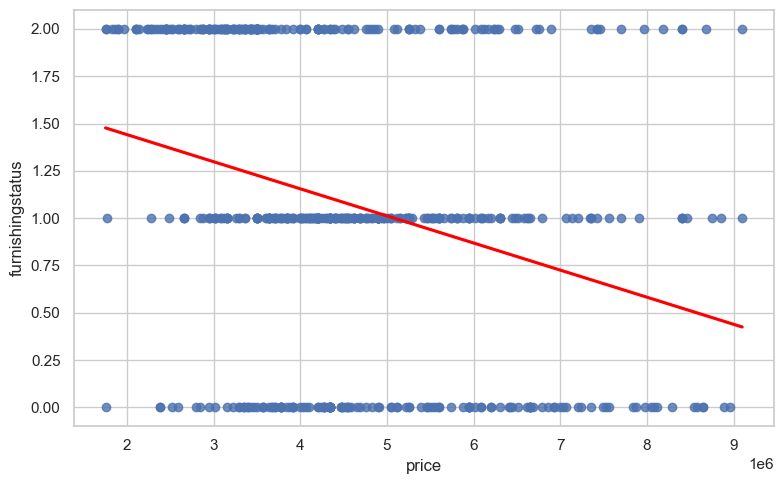

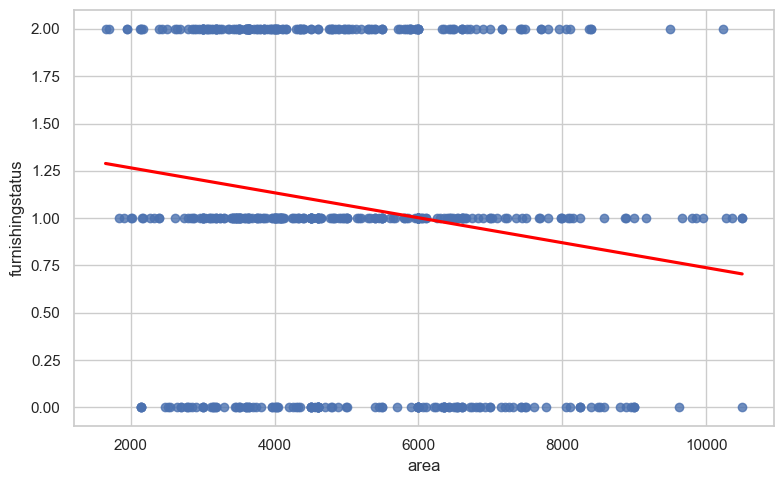

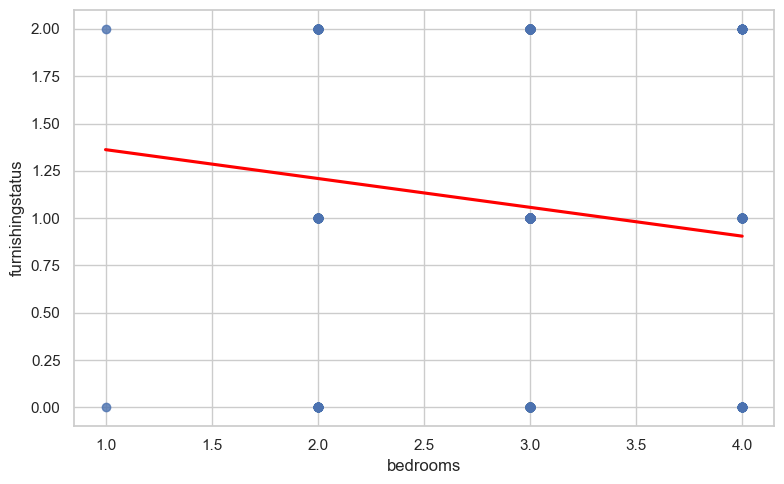

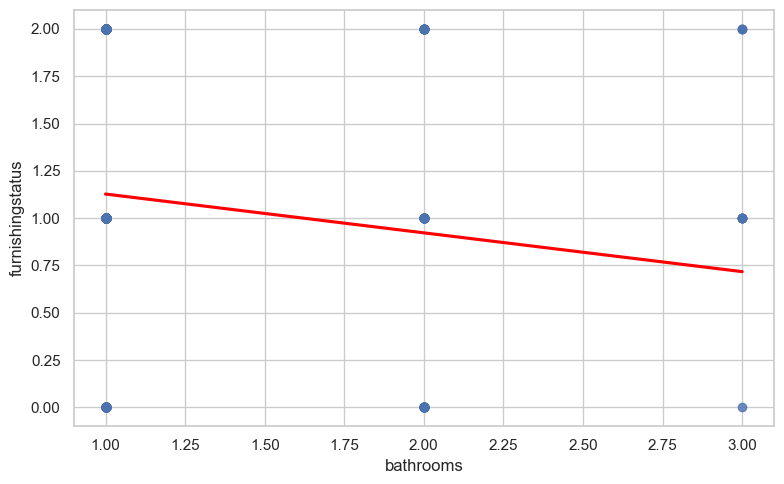

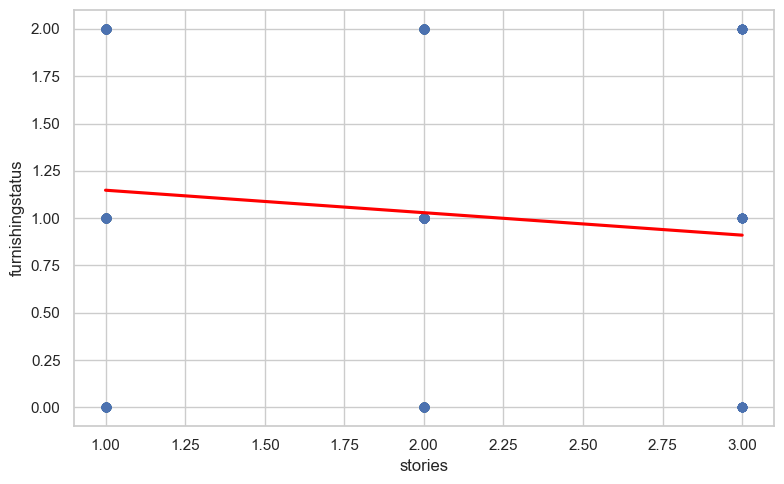

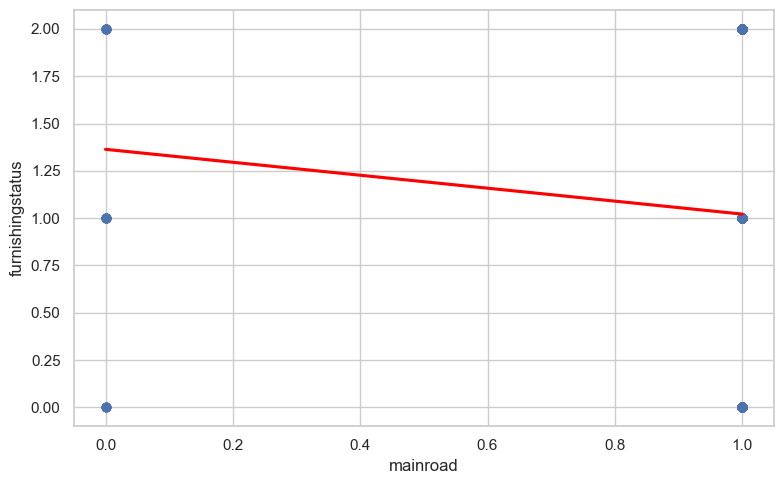

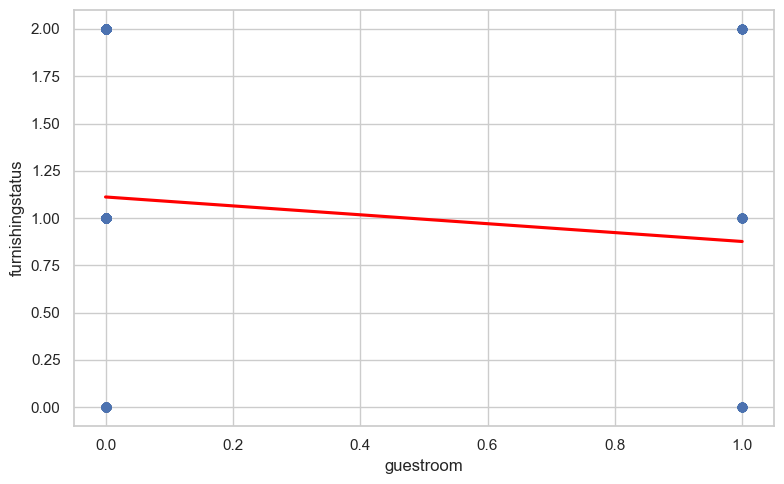

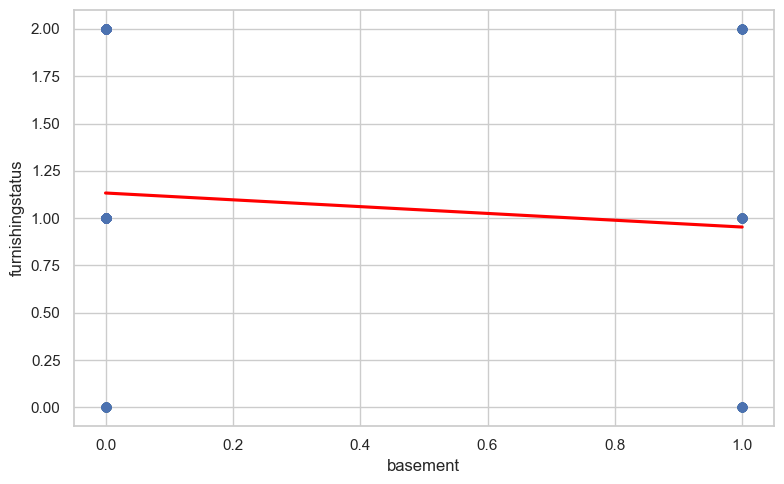

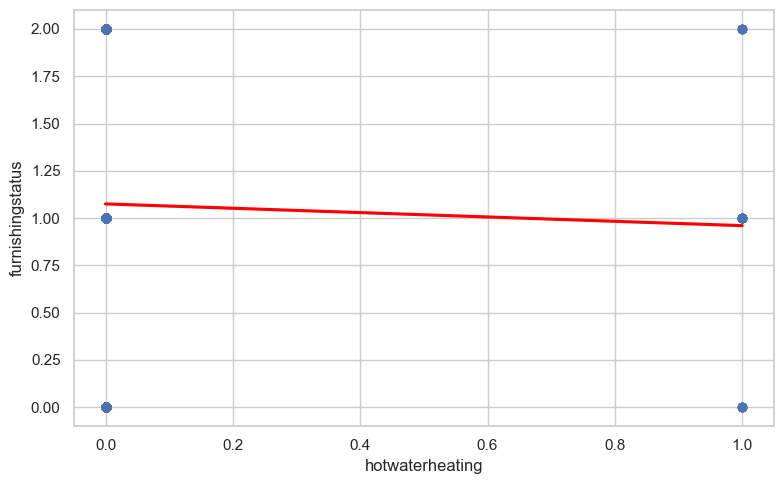

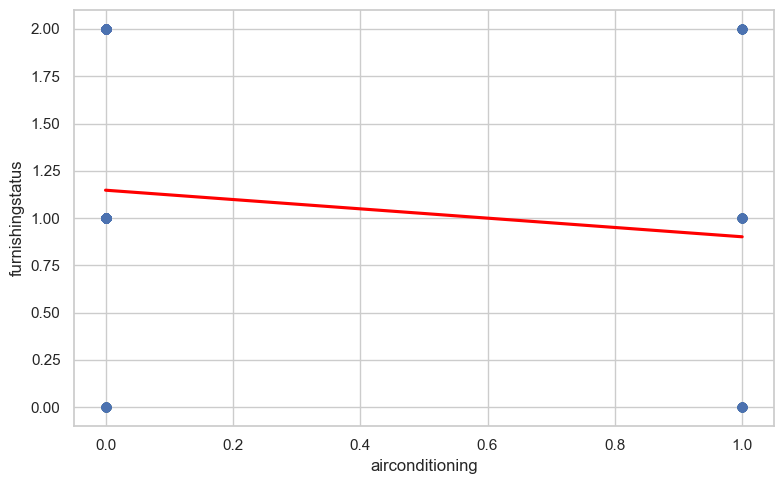

In [ ]:
for i in X.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.regplot(x=House_df[i], y=Y, data=House_df, ci=None, line_kws={"color": "red"})
    plt.xlabel(f'{i}')
    plt.ylabel('furnishingstatus')
    plt.tight_layout()
    plt.show()

In [ ]:
House_df.columns